15:40:39 [DBUG] utils.plotting -- (+21851ms) -- font size set to 9.5
15:40:39 [DBUG] utils.plotting -- (    +3ms) -- label size set to 13.0
15:40:39 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [3.3, 2.5]
15:40:39 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
15:40:39 [DBUG] utils.plotting -- (    +2ms) -- usetex set to True
/tmp/ipykernel_1338264/889903024.py:18: RuntimeWarning: divide by zero encountered in divide
  poisson_err.append(1/np.sqrt(np.cumsum(n[::-1])[::-1]))


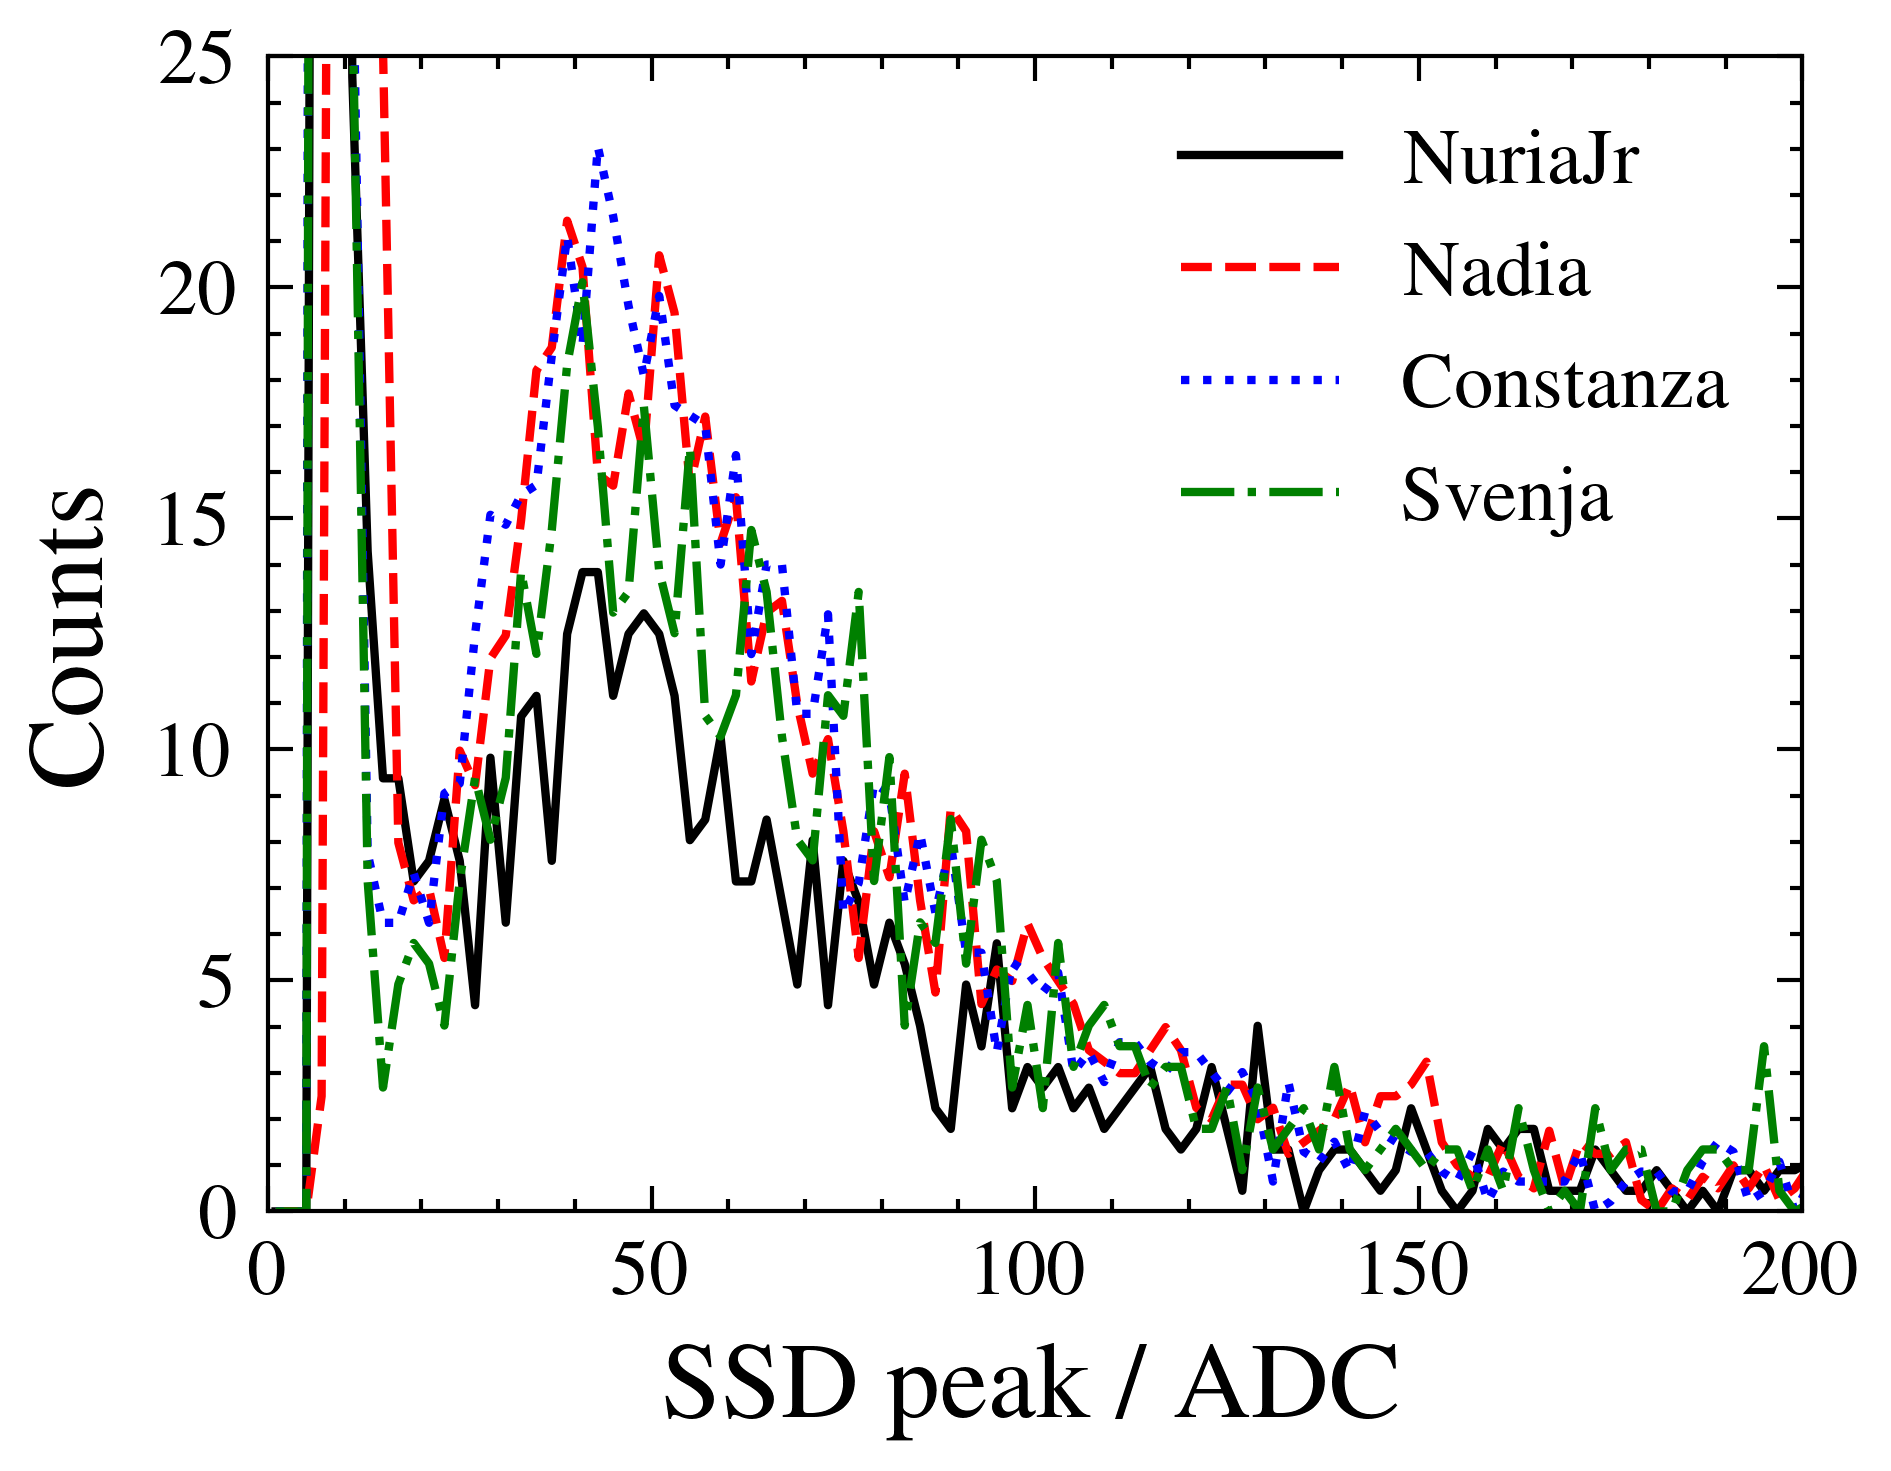

In [4]:
import os
from utils.binaries import *
from utils.plotting import *

set_plt_style('tex double')

ADC_bin_edges = np.array([2*k for k in range(100)] + [200 + 8*k for k in range(51)])
ADC_bin_centers = 0.5 * (ADC_bin_edges[1:] + ADC_bin_edges[:-1])
poisson_err = []

for station in ['NuriaJr', 'Nadia', 'Constanza', 'Svenja']:
    
    date = '2023_03' if not station in ['NuriaJr', 'Svenja'] else '2022_11'
    DAQ_time = len(os.listdir(f'/cr/data02/AugerPrime/UUB/UubRandoms/{date}/{station}')) * 5000 * 2048 * 8.33e-9
    ssd_hist = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/histograms/{station}.ssd')

    n, _ = np.histogram(ssd_hist, bins = ADC_bin_edges)
    poisson_err.append(1/np.sqrt(np.cumsum(n[::-1])[::-1]))

    plt.plot(ADC_bin_centers, n / DAQ_time * 61, label=station)

plt.legend()
plt.ylabel('Counts')
plt.xlabel('SSD peak / ADC')
plt.ylim(0, 25)
plt.xlim(0, 200)

plt.savefig('/cr/users/filip/plots/UubRandoms/histograms/t1_preselected_raw.png', bbox_inches='tight')


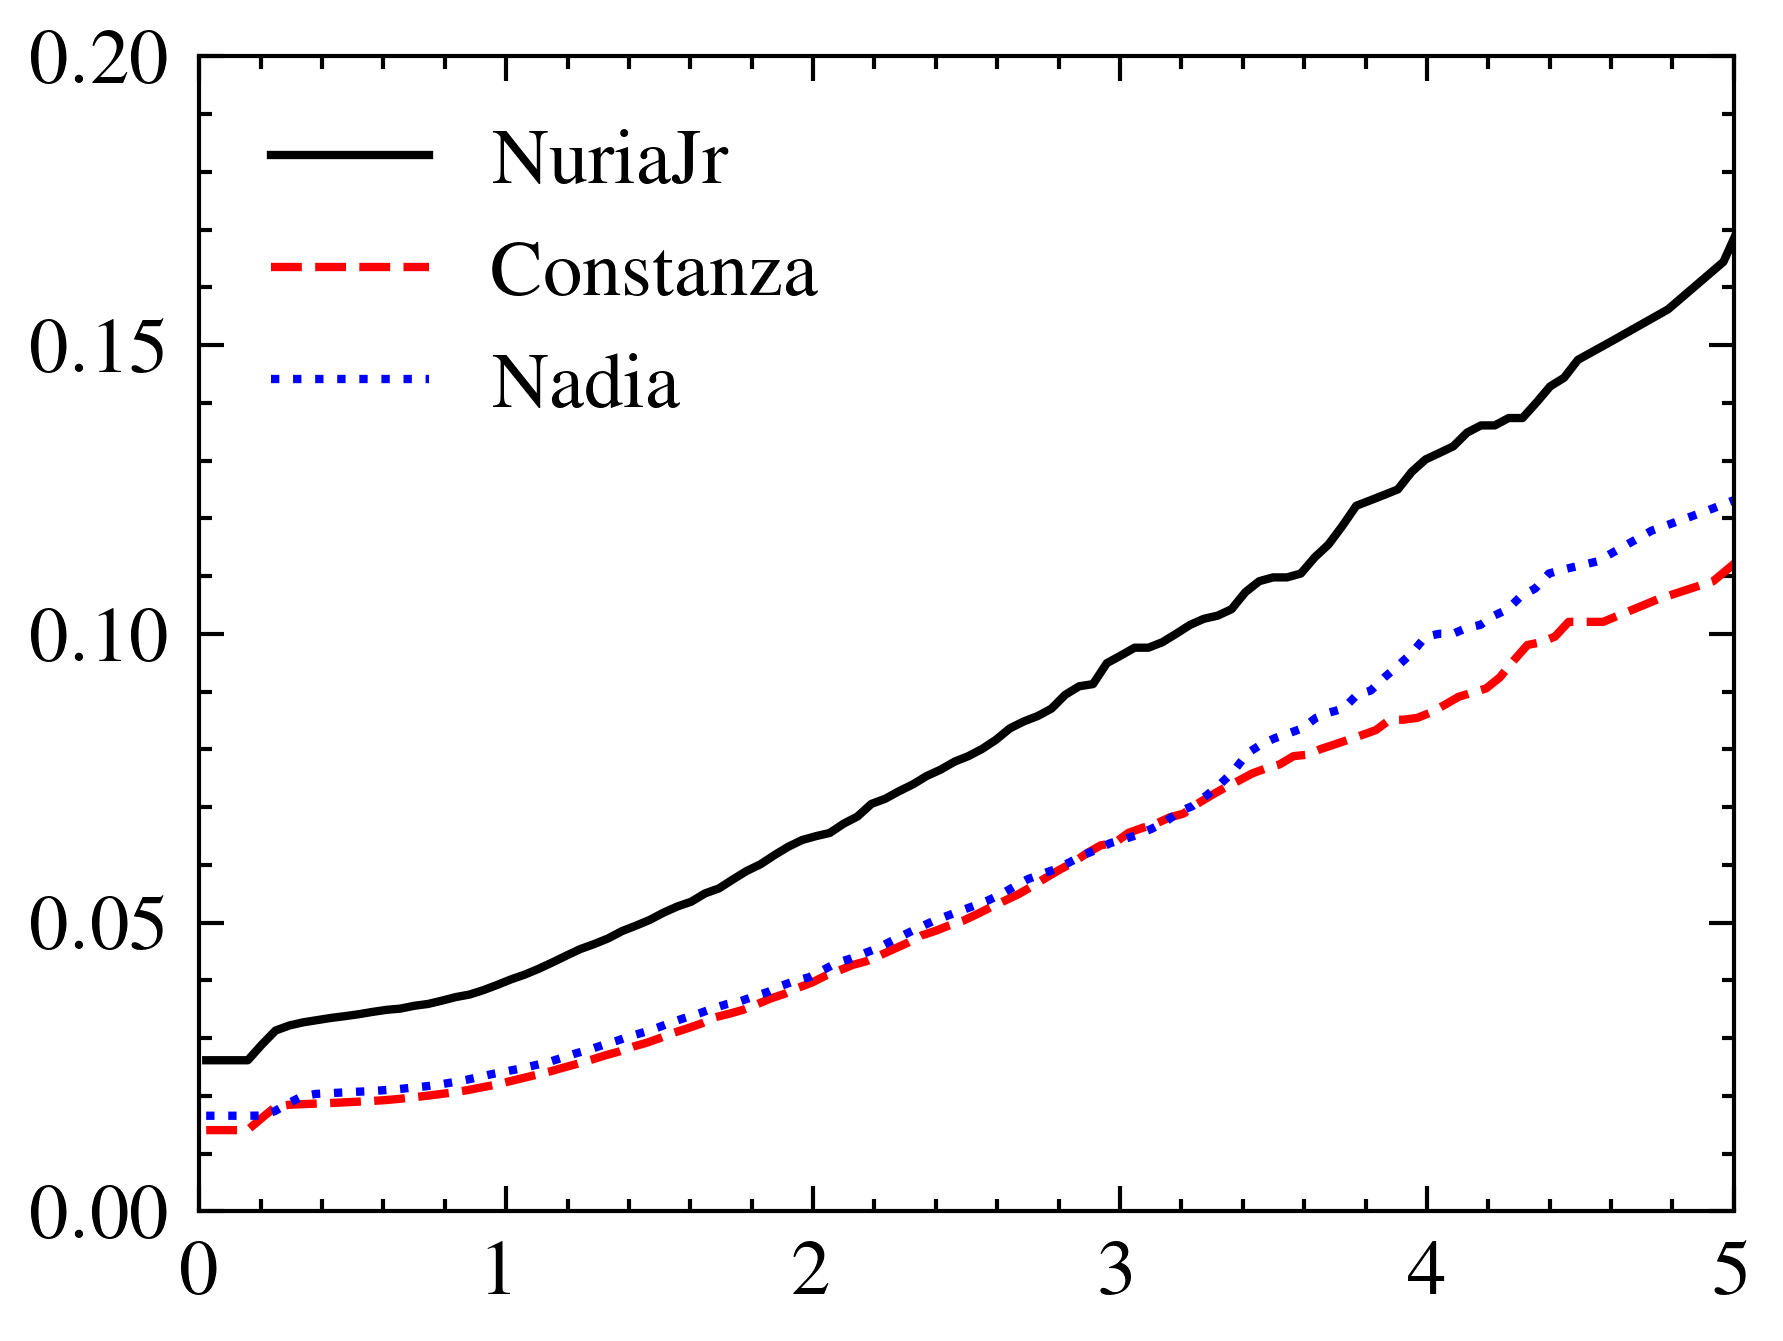

In [2]:
labels = ['NuriaJr', 'Constanza', 'Nadia']

MIP = {'Nadia':             44.8,
       'NuriaJr':           44.3,
       'Constanza' :        44.6}


for station, label in zip(poisson_err, labels):
    plt.plot(ADC_bin_centers / MIP[label], station, label=label)

plt.ylim(0, 0.2)
plt.xlim(0, 5)
plt.legend()

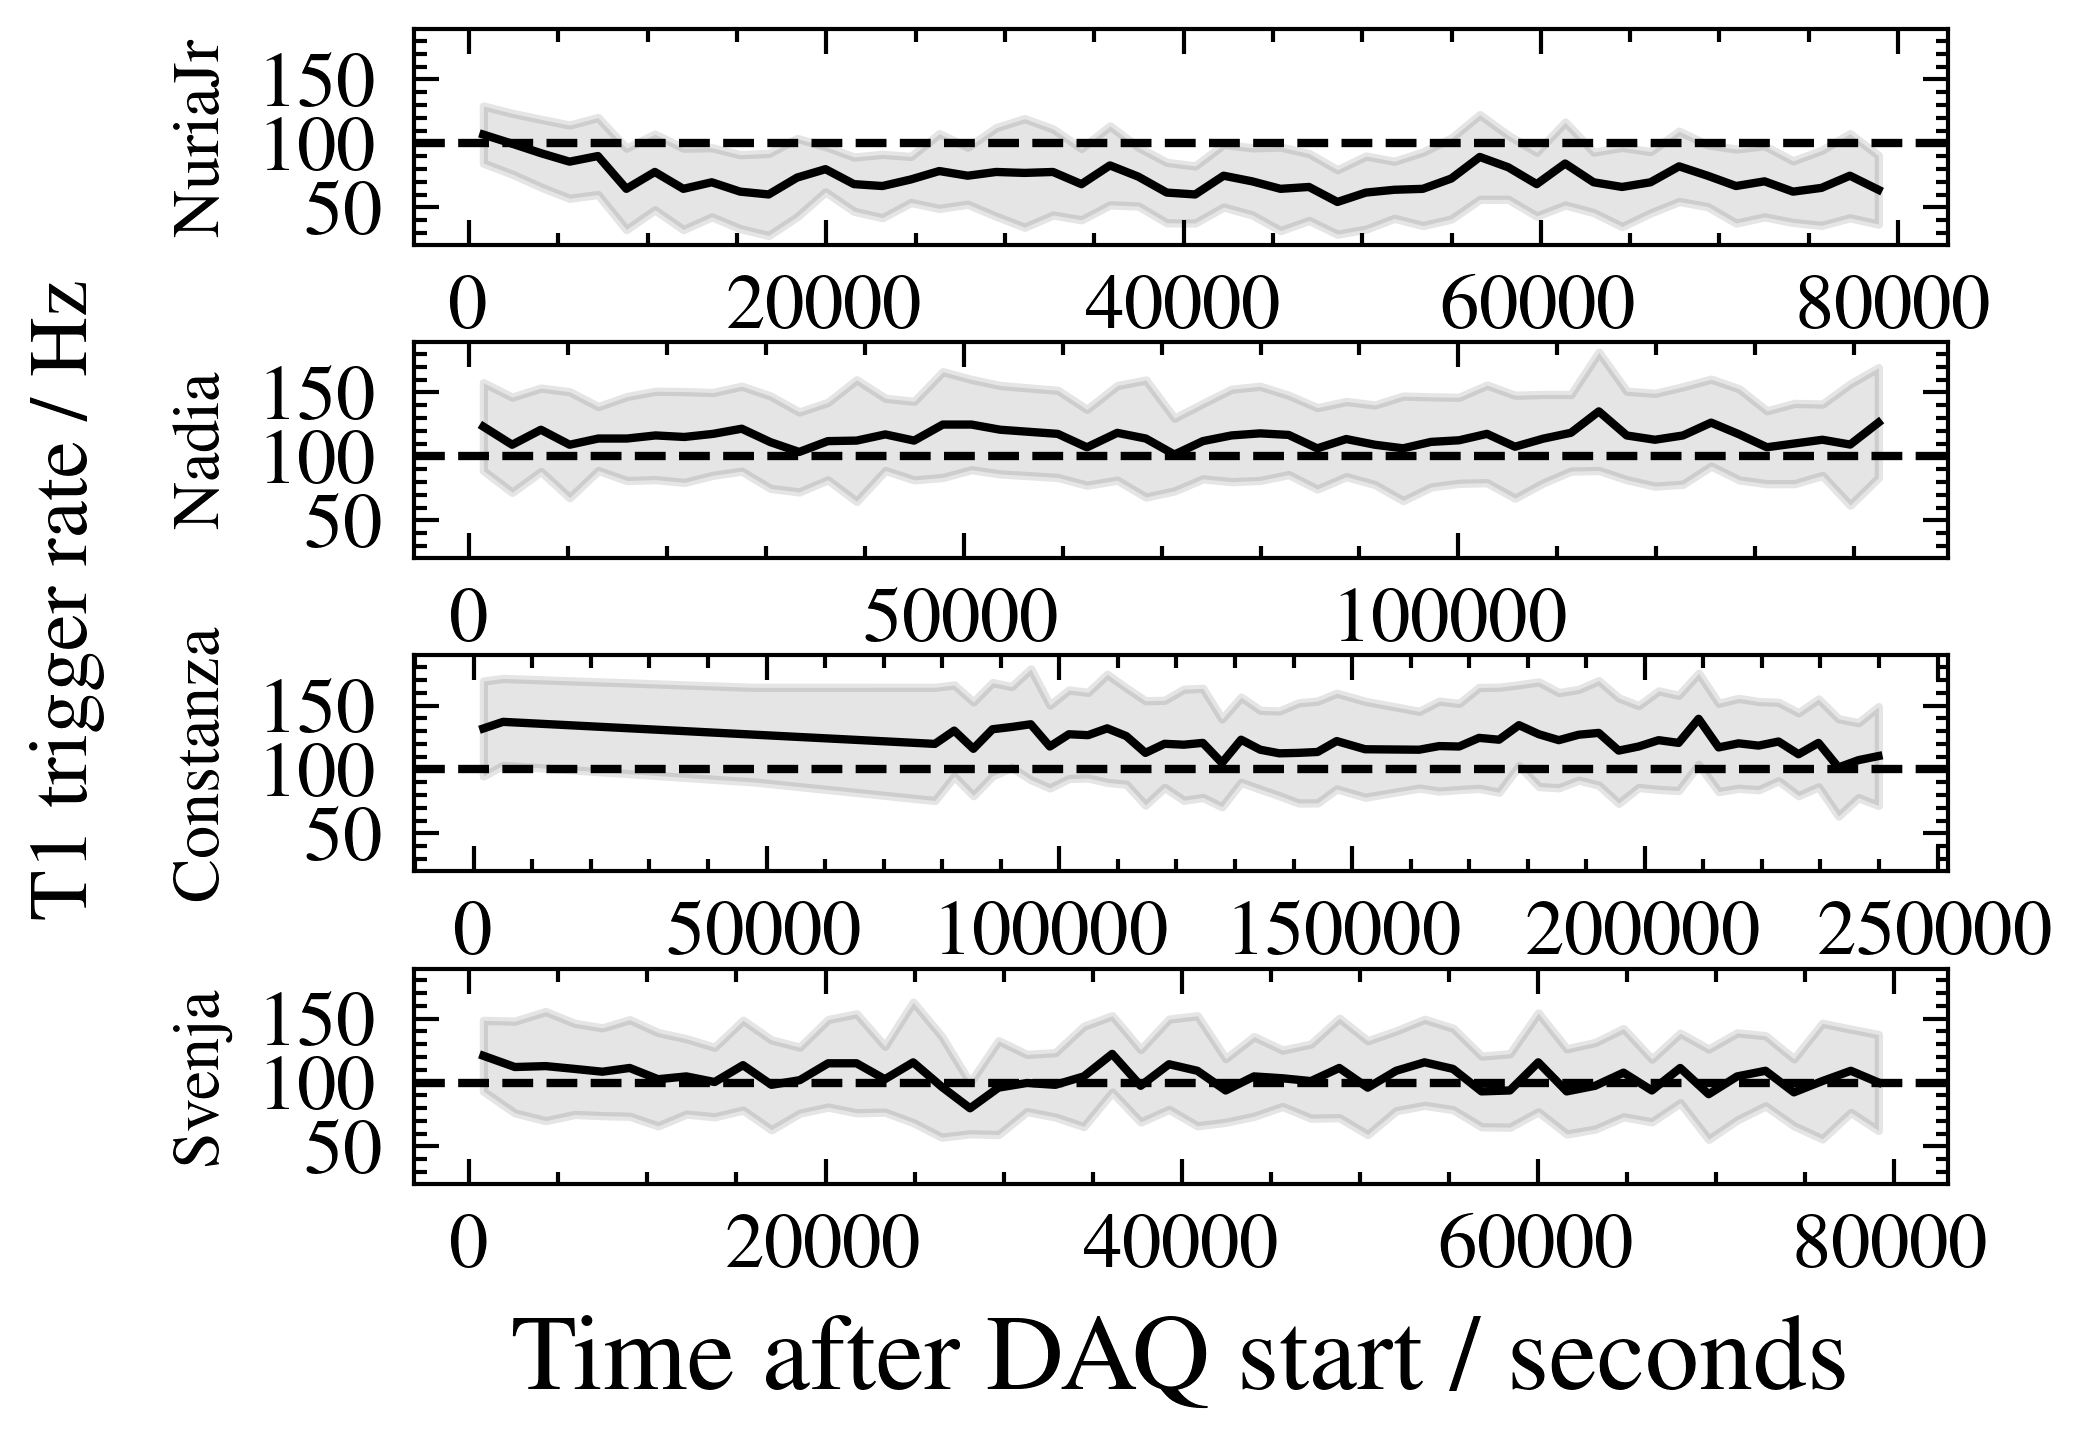

In [5]:
from utils.binaries import *
from utils.plotting import *

from datetime import datetime
fig, axes = plt.subplots(4, 1, sharey=True)

for station, ax in zip(['NuriaJr', 'Nadia', 'Constanza', 'Svenja'], axes):
    t, n, rates = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/t1_rates/{station}.txt', unpack=True)
    t_binned, rates_binned = np.array_split(t, 50), np.array_split(rates, 50)
    t, rates = [np.mean(tx) - t[0] for tx in t_binned], np.array([np.mean(rx) for rx in rates_binned])
    rates_error = np.array([np.std(rx) for rx in rates_binned])
    ax.plot(t, rates, label=station)
    ax.fill_between(t, rates - rates_error, rates + rates_error, color='k', alpha=0.1)
    ax.axhline(100, lw=1, ls='--')
    ax.set_ylabel(station, fontsize=8)

ax.set_xlabel('Time after DAQ start / seconds')
plt.subplots_adjust(hspace=0.45)
fig.text(-.05, 0.5, 'T1 trigger rate / Hz', rotation=90,
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=10)

plt.savefig('/cr/users/filip/plots/UubRandoms/t1_rates.png')

15:36:56 [DBUG] utils.plotting -- (+14926ms) -- font size set to 9.5
15:36:56 [DBUG] utils.plotting -- (    +2ms) -- label size set to 13.0
15:36:56 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [3.3, 2.5]
15:36:56 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
15:36:56 [DBUG] utils.plotting -- (    +1ms) -- usetex set to True
/tmp/ipykernel_1338264/1403420026.py:20: RuntimeWarning: divide by zero encountered in divide
  poisson_err.append(1/np.sqrt(np.cumsum(n[::-1])[::-1]) * correction_factor)


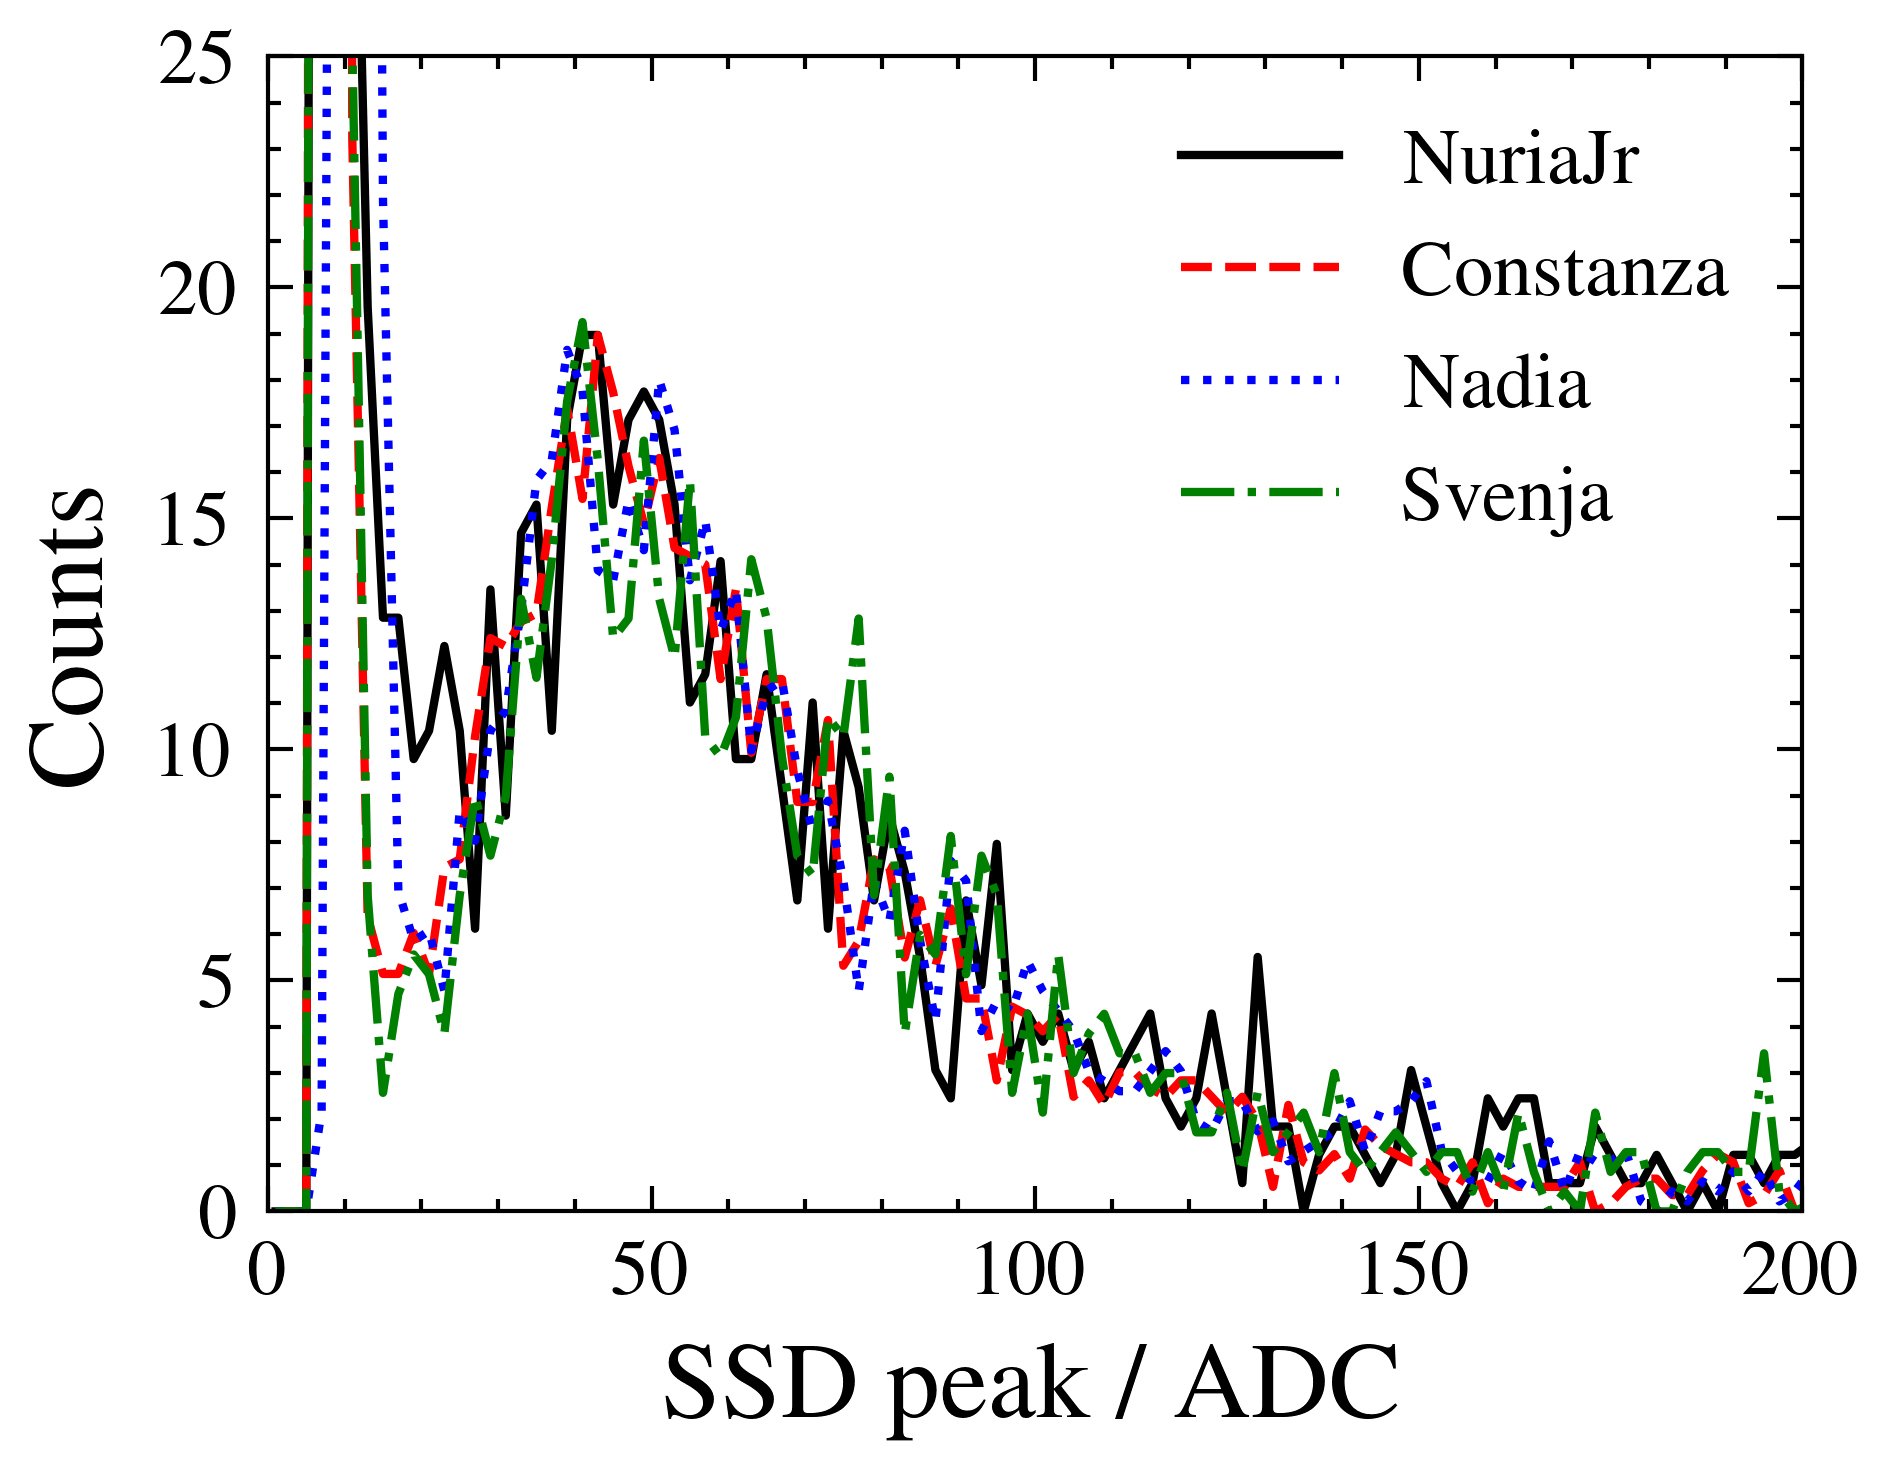

In [2]:
import os
from utils.binaries import *
from utils.plotting import *

set_plt_style('tex double')

ADC_bin_edges = np.array([2*k for k in range(100)] + [200 + 8*k for k in range(51)])
ADC_bin_centers = 0.5 * (ADC_bin_edges[1:] + ADC_bin_edges[:-1])
poisson_err = []

for station in ['NuriaJr', 'Constanza', 'Nadia', 'Svenja']:
    
    date = '2023_03' if not station in ['NuriaJr', 'Svenja'] else '2022_11'
    DAQ_time = len(os.listdir(f'/cr/data02/AugerPrime/UUB/UubRandoms/{date}/{station}')) * 5000 * 2048 * 8.33e-9
    ssd_hist = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/histograms/{station}.ssd')
    rates = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/t1_rates/{station}.txt', usecols=[2])
    correction_factor = np.mean(rates) / 100

    n, _ = np.histogram(ssd_hist, bins = ADC_bin_edges)
    poisson_err.append(1/np.sqrt(np.cumsum(n[::-1])[::-1]) * correction_factor)

    plt.plot(ADC_bin_centers, n / DAQ_time * 61 / correction_factor, label=station)

plt.legend()
plt.ylabel('Counts')
plt.xlabel('SSD peak / ADC')
plt.ylim(0, 25)
plt.xlim(0, 200)

plt.savefig('/cr/users/filip/plots/UubRandoms/histograms/t1_preselected.png', bbox_inches='tight')

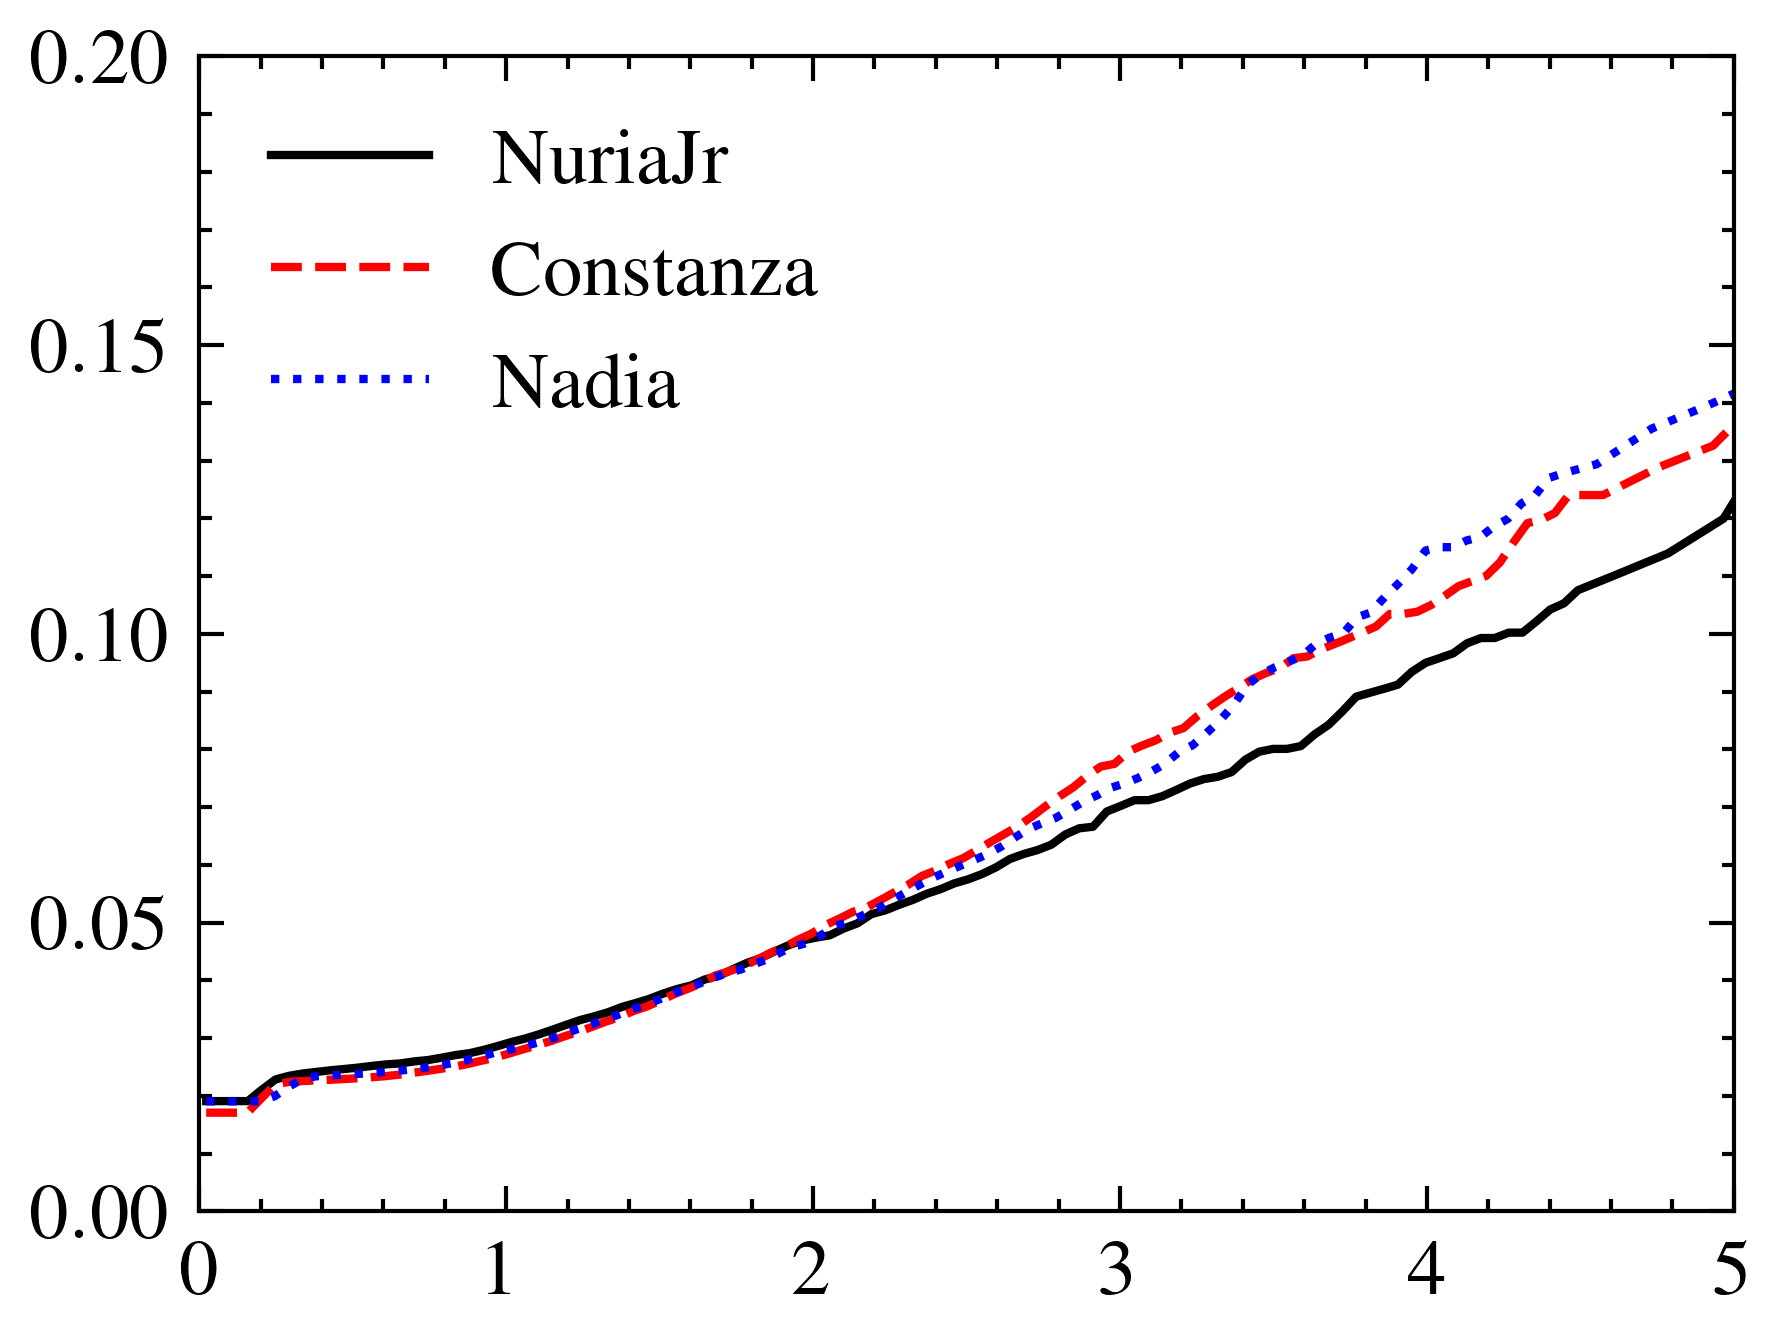

In [5]:
labels = ['NuriaJr', 'Constanza', 'Nadia']
for station, label in zip(poisson_err, labels):
    plt.plot(ADC_bin_centers / MIP[label], station, label=label)

plt.ylim(0, 0.2)
plt.xlim(0, 5)
plt.legend()